In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
# import plotly.graph_objects as go

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

import import_ipynb
# Auxiliar functions
from Auxiliar_functions import *

# Cargamos el Dataset

In [13]:
df_cardiovascular = pd.read_csv('Cardiovascular_Disease_Dataset_Filtered.csv')

# PCA: 3 componentes

In [14]:
pca = PCA(n_components=3)
X = pca.fit_transform(df_cardiovascular.drop(columns=["target", "patientid", "noofmajorvessels"]))
y = df_cardiovascular["target"]

### Visualizacion

In [15]:
plt.Figure(figsize=(10,9))
fig = px.scatter_3d(X,
                    x = X[:,0],
                    y = X[:,1],
                    z = X[:,2], 
                    color=y,
                    title='PCA',
                    opacity=0.7)
fig.show()

## Baseline Model

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
models = models_training(X_train,y_train)

Matriz de Confusion para random_forest
[[29 11]
 [16 98]]
Matriz de Confusion para logistic_regression
[[ 23  17]
 [ 12 102]]
Matriz de Confusion para Decision_tree
[[25 15]
 [22 92]]
Matriz de Confusion para Naive_Bayes
[[ 21  19]
 [  8 106]]
Matriz de Confusion para xgboost
[[30 10]
 [17 97]]


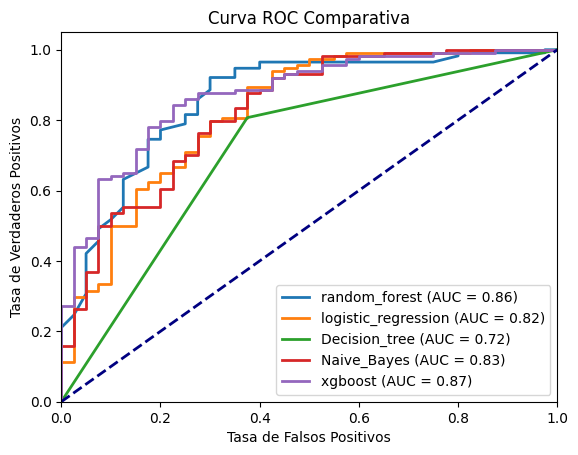


Métricas de Rendimiento para cada Modelo:
                     accuracy  precision    recall        f1    pr_auc
random_forest        0.824675   0.899083  0.859649  0.878924  0.860197
logistic_regression  0.811688   0.857143  0.894737  0.875536  0.823904
Decision_tree        0.759740   0.859813  0.807018  0.832579  0.716009
Naive_Bayes          0.824675   0.848000  0.929825  0.887029  0.825219
xgboost              0.824675   0.906542  0.850877  0.877828  0.871272


In [18]:
modelos(X_test,y_test,models)

## Validacion con otro dataset

In [20]:
df_cardiovascular_2 = pd.read_csv("Cardiovascular_Disease_Dataset_2_Filtered.csv")
df_cardiovascular_2

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,target
0,40,1,1,140,289,0,0,172,0,0.0,1,0
1,49,0,2,160,180,0,0,156,0,1.0,2,1
2,37,1,1,130,283,0,1,98,0,0.0,1,0
3,48,0,3,138,214,0,0,108,1,1.5,2,1
4,54,1,2,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
741,45,1,0,110,264,0,0,132,0,1.2,2,1
742,68,1,3,144,193,1,0,141,0,3.4,2,1
743,57,1,3,130,131,0,0,115,1,1.2,2,1
744,57,0,1,130,236,0,2,174,0,0.0,2,1


In [21]:
X = pca.transform(df_cardiovascular_2.drop(columns=["target"]))
y = df_cardiovascular_2["target"]

In [22]:
plt.Figure(figsize=(10,9))
fig = px.scatter_3d(X,
                    x = X[:,0],
                    y = X[:,1],
                    z = X[:,2], 
                    color=y,
                    title='PCA',
                    opacity=0.7)
fig.show()

Matriz de Confusion para random_forest
[[207 183]
 [201 155]]
Matriz de Confusion para logistic_regression
[[285 105]
 [268  88]]
Matriz de Confusion para Decision_tree
[[192 198]
 [193 163]]
Matriz de Confusion para Naive_Bayes
[[254 136]
 [245 111]]
Matriz de Confusion para xgboost
[[191 199]
 [182 174]]


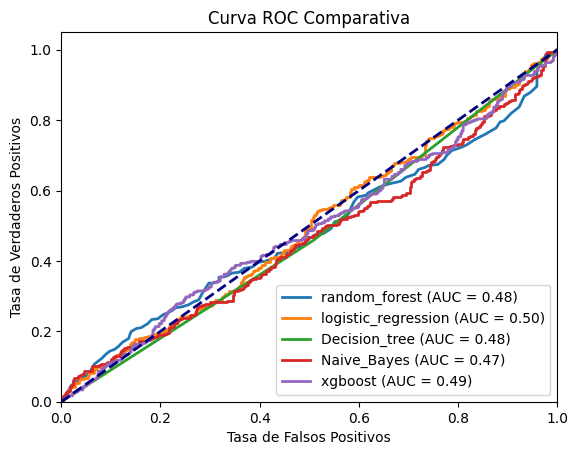


Métricas de Rendimiento para cada Modelo:
                     accuracy  precision    recall        f1    pr_auc
random_forest        0.485255   0.458580  0.435393  0.446686  0.480553
logistic_regression  0.500000   0.455959  0.247191  0.320583  0.495895
Decision_tree        0.475871   0.451524  0.457865  0.454672  0.475086
Naive_Bayes          0.489276   0.449393  0.311798  0.368159  0.466407
xgboost              0.489276   0.466488  0.488764  0.477366  0.490302


In [23]:
modelos(X,y,models)

## Normalizacion, Balanceo y PCA

In [24]:
X = df_cardiovascular.drop(columns=["patientid","noofmajorvessels","target"])
y = df_cardiovascular["target"]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
pipeline = Pipeline([('scaler', MinMaxScaler()),('pca', PCA(n_components=3)),('oversampling', SMOTE())])

In [29]:
X_train_resampled, y_train_resampled = pipeline.fit_resample(X_train, y_train)

Matriz de Confusion para random_forest
[[  0  40]
 [  0 114]]
Matriz de Confusion para logistic_regression
[[  0  40]
 [  0 114]]
Matriz de Confusion para Decision_tree
[[  0  40]
 [  0 114]]
Matriz de Confusion para Naive_Bayes
[[  0  40]
 [  0 114]]
Matriz de Confusion para xgboost
[[  0  40]
 [  0 114]]


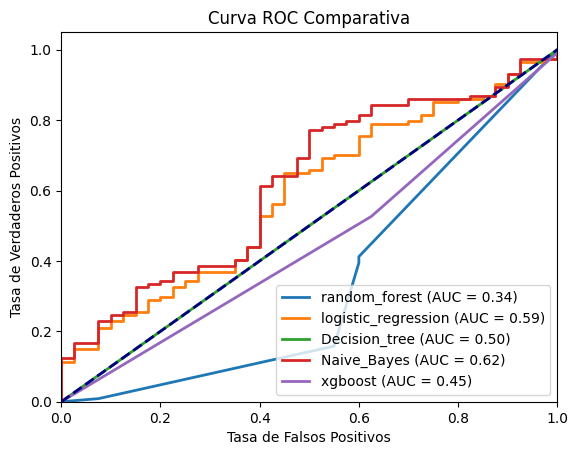


Métricas de Rendimiento para cada Modelo:
                     accuracy  precision  recall        f1    pr_auc
random_forest         0.74026    0.74026     1.0  0.850746  0.336184
logistic_regression   0.74026    0.74026     1.0  0.850746  0.586404
Decision_tree         0.74026    0.74026     1.0  0.850746  0.500000
Naive_Bayes           0.74026    0.74026     1.0  0.850746  0.619298
xgboost               0.74026    0.74026     1.0  0.850746  0.449013


In [30]:
scaler = pipeline.named_steps['scaler']
X_test_scaled = scaler.transform(X_test)
pca = pipeline.named_steps['pca']
X_test_pca = pca.transform(X_test_scaled)
modelos(X_test_pca,y_test,models)

Using 154 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


SHAP explicación para random_forest


100%|██████████| 154/154 [00:01<00:00, 102.60it/s]


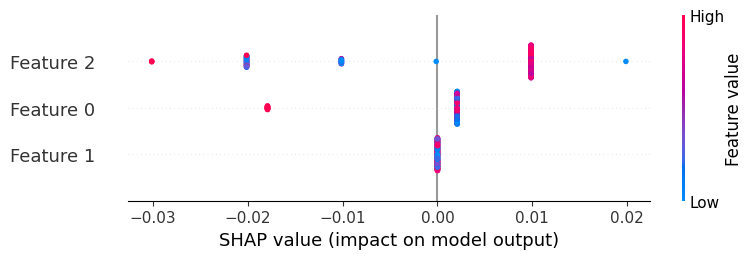

Using 154 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


SHAP explicación para logistic_regression


100%|██████████| 154/154 [00:00<00:00, 476.07it/s]


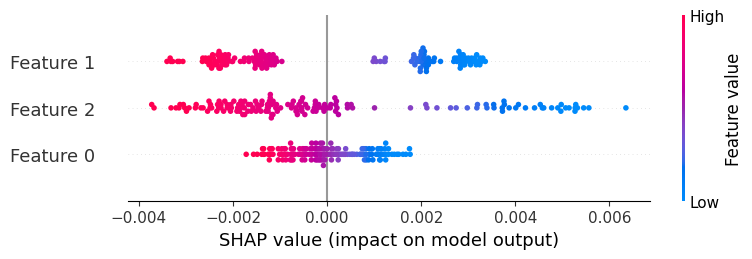

Using 154 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


SHAP explicación para Decision_tree


100%|██████████| 154/154 [00:00<00:00, 971.47it/s]


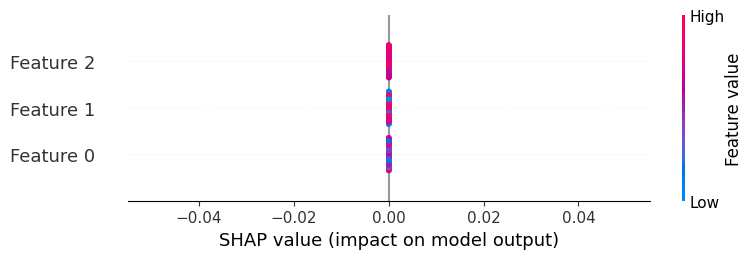

Using 154 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


SHAP explicación para Naive_Bayes


100%|██████████| 154/154 [00:00<00:00, 421.66it/s]


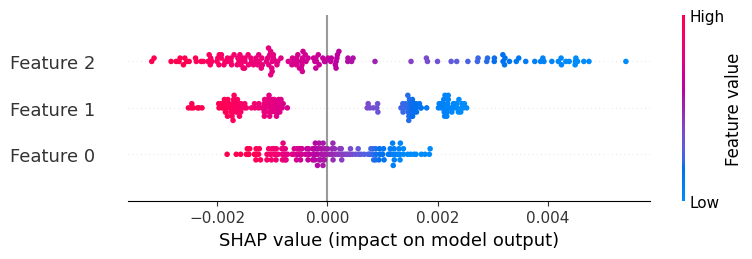

Using 154 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


SHAP explicación para xgboost


100%|██████████| 154/154 [00:00<00:00, 238.70it/s]


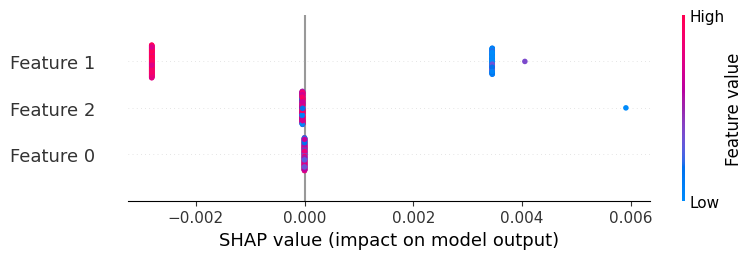

In [31]:
for name,model in models.items():
    print(f"SHAP explicación para {name}")
    explainer = shap.KernelExplainer(model=model.predict_proba, data=X_test_pca)
    shap_values = explainer.shap_values(X_test_pca)
    shap.summary_plot(shap_values[:,:,0], X_test_pca)

## Validacion con otro dataset

In [32]:
X = df_cardiovascular_2.drop(columns=['target'])
y = df_cardiovascular_2['target']

Matriz de Confusion para random_forest
[[  0 390]
 [  0 356]]
Matriz de Confusion para logistic_regression
[[  0 390]
 [  0 356]]
Matriz de Confusion para Decision_tree
[[  0 390]
 [  0 356]]
Matriz de Confusion para Naive_Bayes
[[  0 390]
 [  0 356]]
Matriz de Confusion para xgboost
[[  0 390]
 [  0 356]]


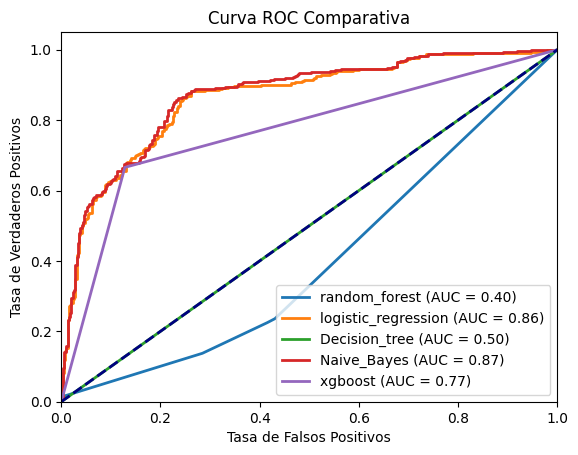


Métricas de Rendimiento para cada Modelo:
                     accuracy  precision  recall        f1    pr_auc
random_forest        0.477212   0.477212     1.0  0.646098  0.400475
logistic_regression  0.477212   0.477212     1.0  0.646098  0.862828
Decision_tree        0.477212   0.477212     1.0  0.646098  0.500000
Naive_Bayes          0.477212   0.477212     1.0  0.646098  0.868871
xgboost              0.477212   0.477212     1.0  0.646098  0.768763


In [33]:
X_test_scaled = scaler.transform(X)
X_test_pca = pca.transform(X_test_scaled)
modelos(X_test_pca,y,models)

Using 746 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


SHAP explicación para random_forest


100%|██████████| 746/746 [00:12<00:00, 58.44it/s]


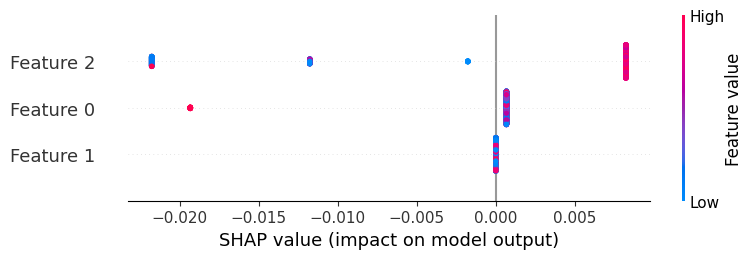

Using 746 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


SHAP explicación para logistic_regression


100%|██████████| 746/746 [00:01<00:00, 444.77it/s]


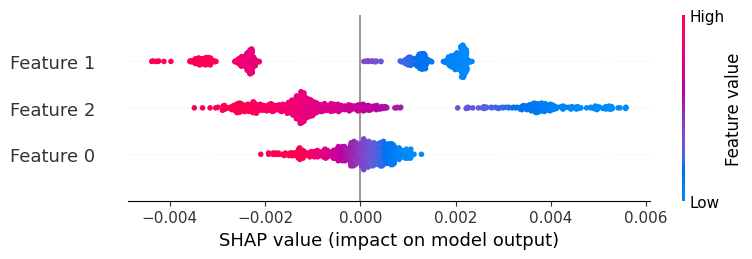

Using 746 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


SHAP explicación para Decision_tree


100%|██████████| 746/746 [00:00<00:00, 863.54it/s]


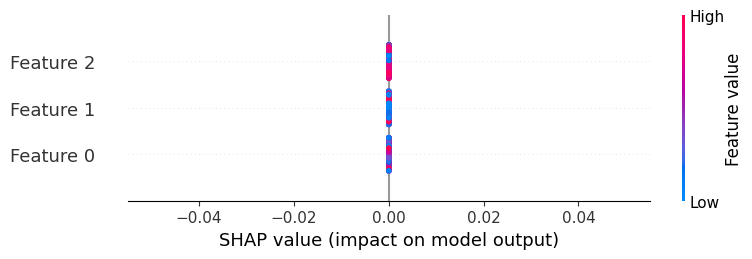

Using 746 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


SHAP explicación para Naive_Bayes


100%|██████████| 746/746 [00:02<00:00, 365.28it/s]


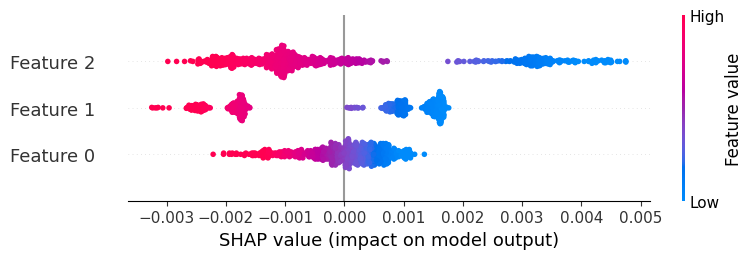

Using 746 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


SHAP explicación para xgboost


100%|██████████| 746/746 [00:03<00:00, 222.56it/s]


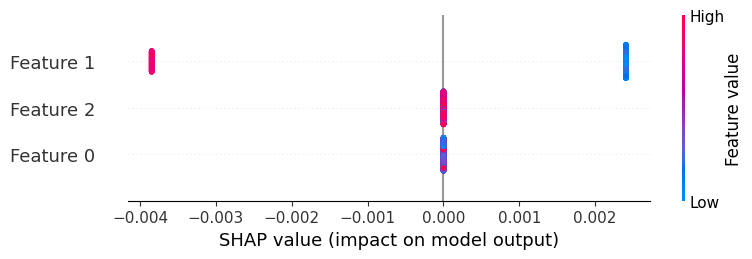

In [34]:
for name,model in models.items():
    print(f"SHAP explicación para {name}")
    explainer = shap.KernelExplainer(model=model.predict_proba, data=X_test_pca)
    shap_values = explainer.shap_values(X_test_pca)
    shap.summary_plot(shap_values[:,:,0], X_test_pca)